In [28]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from matplotlib.font_manager import FontProperties

In [2]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Twitter API Keys
with open("../API_TAT.txt") as key:
    access_token = key.readlines()
with open("../API_TATS.txt") as key:
    access_token_secret = key.readlines()
with open("../API_TCK.txt") as key:
    consumer_key = key.readlines()
with open("../API_TCS.txt") as key:
    consumer_secret = key.readlines()
#print(access_token, access_token_secret, consumer_key, consumer_secret)

In [4]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key[0], consumer_secret[0])
auth.set_access_token(access_token[0], access_token_secret[0])
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
# Target User Accounts
target_user = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes")

In [16]:
# Variables for holding sentiments
sentiments = []

# Loop through each user
for user in target_user:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    counter = 1

    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):
        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page=x)

        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            
            # Add sentiments for each tweet into an array
            sentiments.append({"Date": tweet["created_at"],
                               "Account": user,
                               "Text": tweet["text"],
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter})

            # Add to counter 
            counter = counter + 1

In [17]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd

,Account,Compound,Date,Negative,Neutral,Positive,Text,Tweets Ago
0,@BBC,0.4019,Thu Mar 08 20:33:04 +0000 2018,0.856,0.000,0.144,Jack Jarvis and Victor McDade are back for ano...,1
1,@BBC,0.0000,Thu Mar 08 20:03:04 +0000 2018,1.000,0.000,0.000,Lucy and Lee are back! 🙌🎉\n\n#NotGoingOut | 9p...,2
2,@BBC,0.0000,Thu Mar 08 18:00:06 +0000 2018,1.000,0.000,0.000,What advice would YOU give your younger self? ...,3
3,@BBC,-0.1027,Thu Mar 08 17:30:11 +0000 2018,0.664,0.177,0.159,"In recognition of International Women’s Day, a...",4
4,@BBC,0.0000,Thu Mar 08 17:00:09 +0000 2018,1.000,0.000,0.000,🔬 More than half of the UK can't name a famous...,5
5,@BBC,0.5719,Thu Mar 08 16:30:05 +0000 2018,0.764,0.000,0.236,✍️🙌 Lotte Reiniger is the unsung heroine of ea...,6
6,@BBC,0.5803,Thu Mar 08 16:05:42 +0000 2018,0.819,0.000,0.181,RT @BBCMOTD: Favourite emoji?\nChampions Leagu...,7
7,@BBC,0.0000,Thu Mar 08 15:30:09 +0000 2018,1.000,0.000,0.000,⚽️🥅 The story of the fall and rise of women's ...,8
8,@BBC,0.0000,Thu Mar 08 15:09:13 +0000 2018,1.000,0.000,0.000,RT @bbcmusic: 🙌 @Camila_Cabello just dropped t...,9
9,@BBC,0.0000,Thu Mar 08 15:00:05 +0000 2018,1.000,0.000,0.000,Nine-year-old Lola thinks more girls should ta...,10


In [13]:
# Export file as a CSV
sentiments_pd.to_csv("Sentiment_data.csv", header=True)

In [24]:
account_colors = sentiments_pd.replace({"@BBC":"lightblue","@CBS":"green","@CNN":"red","@FoxNews":"darkblue","@nytimes":"yellow"})
account_colors.head()


,Account,Compound,Date,Negative,Neutral,Positive,Text,Tweets Ago
0,lightblue,0.4019,Thu Mar 08 20:33:04 +0000 2018,0.856,0.000,0.144,Jack Jarvis and Victor McDade are back for ano...,1
1,lightblue,0.0000,Thu Mar 08 20:03:04 +0000 2018,1.000,0.000,0.000,Lucy and Lee are back! 🙌🎉\n\n#NotGoingOut | 9p...,2
2,lightblue,0.0000,Thu Mar 08 18:00:06 +0000 2018,1.000,0.000,0.000,What advice would YOU give your younger self? ...,3
3,lightblue,-0.1027,Thu Mar 08 17:30:11 +0000 2018,0.664,0.177,0.159,"In recognition of International Women’s Day, a...",4
4,lightblue,0.0000,Thu Mar 08 17:00:09 +0000 2018,1.000,0.000,0.000,🔬 More than half of the UK can't name a famous...,5


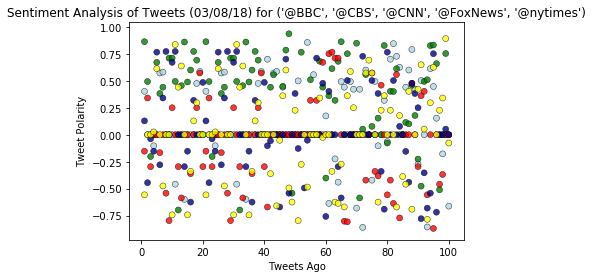

In [38]:
# Create scatter plot
plt.scatter(sentiments_pd["Tweets Ago"], sentiments_pd["Compound"], marker="o", facecolors=account_colors["Account"], 
            edgecolors='black', label=sentiments_pd["Account"], linewidth=0.5, alpha=0.8)

# # Incorporate the other graph properties
plt.title("Sentiment Analysis of Tweets (%s) for %s" % (time.strftime("%x"), target_user))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
#plt.legend(loc='upper center')

# Save the figure
plt.savefig("Sentiment_Scatterplot.png")

plt.show()

In [40]:
account_sentiments = sentiments_pd.groupby(by="Account")
account_sentiment_average = account_sentiments["Compound"].mean()
print(account_sentiment_average)

Account
@BBC        0.124340
@CBS        0.306227
@CNN       -0.054539
@FoxNews    0.041739
@nytimes   -0.003278
Name: Compound, dtype: float64


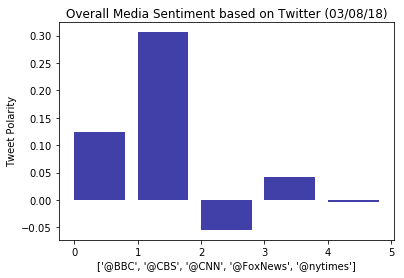

In [52]:
# Create bar chart
media_accounts = ["@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes"]
colors = ["lightblue", "green", "red", "darkblue", "yellow"]
x_axis = np.arange(0, len(target_user))
tick_locations = []
for x in x_axis:
    tick_locations.append(x + 0.4)
    
plt.title("Overall Media Sentiment based on Twitter (%s)" % (time.strftime("%x")))
plt.xlabel(media_accounts)
plt.ylabel("Tweet Polarity")

x = range(5)
plt.bar(x, account_sentiment_average, facecolor='darkblue', alpha=0.75, align="edge")

plt.show()